<a href="https://colab.research.google.com/github/Odilon01/-Data-Science---Alura/blob/main/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy  as np
import seaborn as sns

Conectando no google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso Estatística Python/Projeto Final/Dados/dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
classes = [0, 1576,3152,7880,15760,200000]

### 2º Definir os labels das classes

In [ ]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [ ]:
pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

### 4º Construir a coluna de percentuais

In [ ]:
percentual_classes = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True),normalize=True
).round(2)
percentual_classes

E    0.65
D    0.22
C    0.10
B    0.03
A    0.01
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
frenquencia_classes= pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels))
frenquencia_classes.round(2)

E    46888
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [ ]:
dist_frenquencia_classe = pd.DataFrame({'Frenquência': frenquencia_classes, 'Classe': percentual_classes})
dist_frenquencia_classe.sort_index(ascending=False)
dist_frenquencia_classe

,Frenquência,Classe
E,46888,0.65
D,16700,0.22
C,7599,0.10
B,2178,0.03
A,608,0.01


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

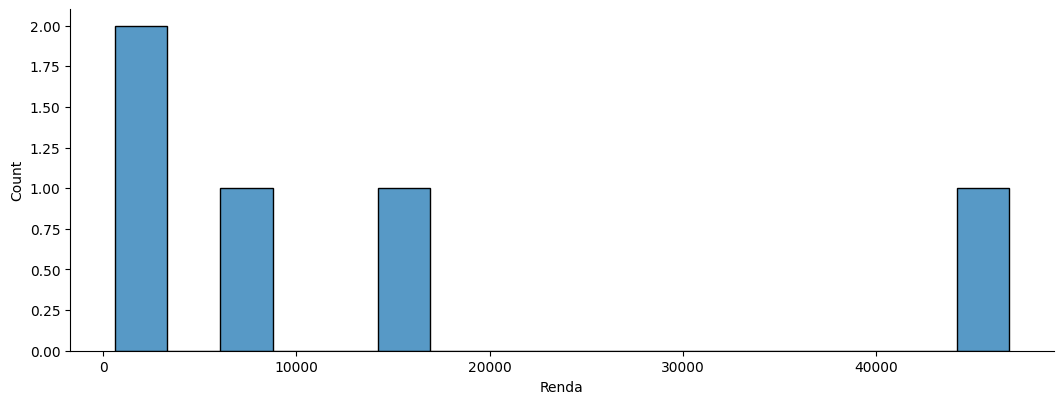

In [ ]:
ax = sns.displot(frenquencia_classes, bins=17)
ax.figure.set_size_inches(12,4)

ax

> ### Conclusões

A maioria das pessoas ganham menos de 2 salários minimos

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Axes: title={'center': 'Frenquência da faixa de salário Minimo'}, xlabel='Sálario'>

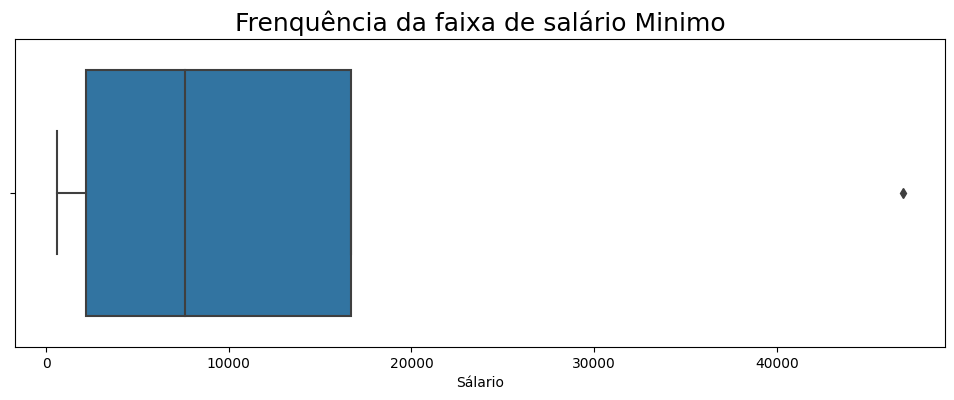

In [ ]:
ax = sns.boxplot(x = frenquencia_classes, data = dados, orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Frenquência da faixa de salário Minimo',fontsize=18)
ax.set_xlabel('Sálario')

ax

<Axes: title={'center': 'Faixa de Idades'}, xlabel='Idades', ylabel='Sexo'>

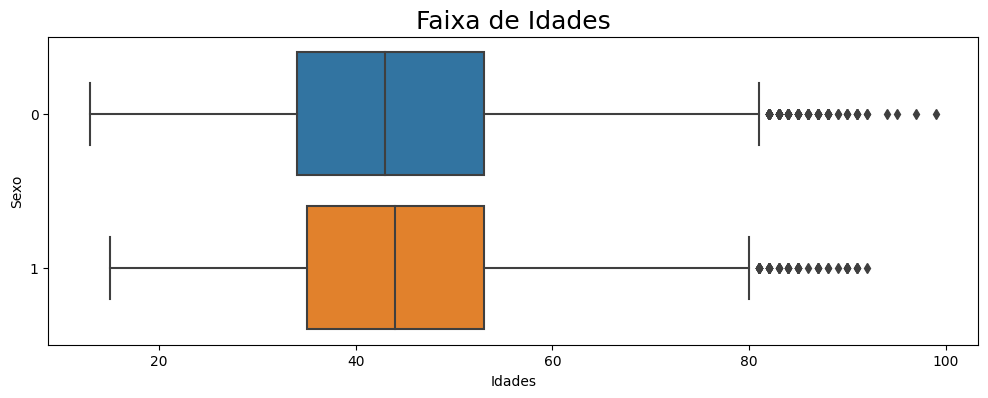

In [ ]:
ax = sns.boxplot(x = 'Idade', y = 'Sexo', data = dados, orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Faixa de Idades',fontsize=18)
ax.set_xlabel('Idades')

ax

<Axes: title={'center': 'Faixa de Altura'}, xlabel='Metro', ylabel='Sexo'>

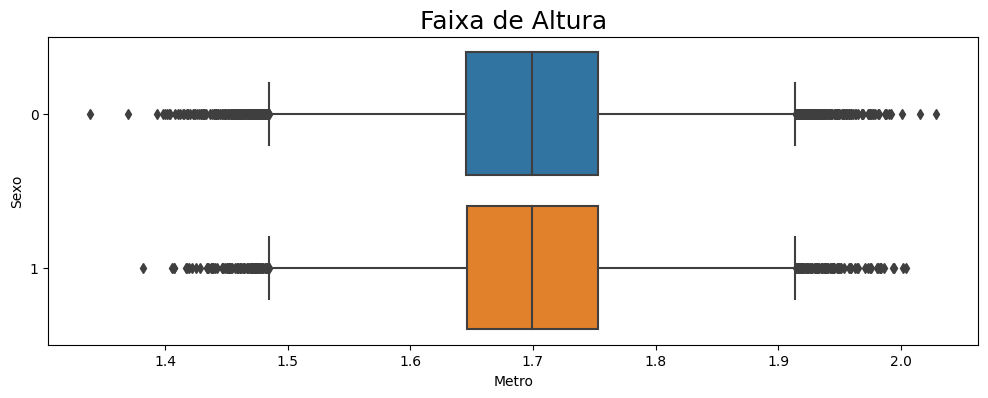

In [ ]:
ax = sns.boxplot(x = 'Altura', y= 'Sexo', data = dados, orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Faixa de Altura',fontsize=18)
ax.set_xlabel('Metro')

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: title={'center': 'Pessaos com Renda acima de 20k'}, xlabel='Renda', ylabel='Sexo'>

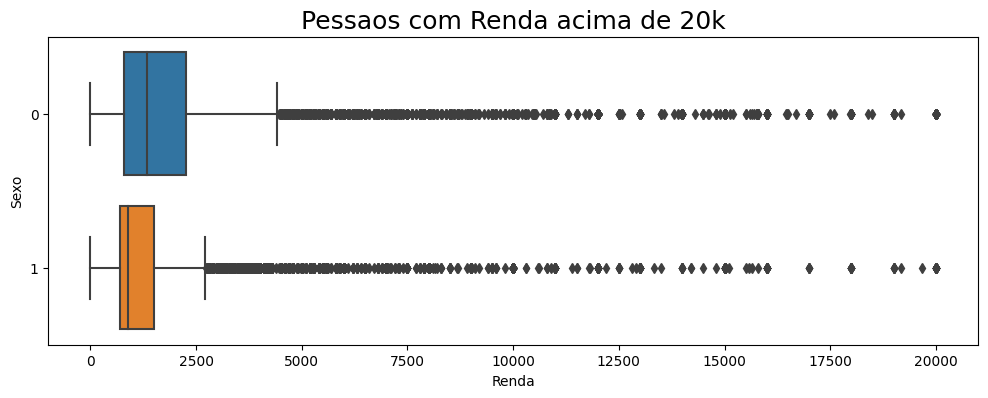

In [ ]:
ax = sns.boxplot(x = 'Renda', y='Sexo', data = dados.query('Renda <= 20000'), orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Pessaos com Renda acima de 20k',fontsize=18)
ax.set_xlabel('Renda')

ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [ ]:
#replicando dados para as colunas
dados['Sexo'] = dados['Sexo'].replace(sexo)
dados['Cor'] = dados['Cor'].replace(cor)
dados['Anos de Estudo'] = dados['Anos de Estudo'].replace(anos_de_estudo)
dados['UF'] = dados['UF'].replace(uf)


In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631


In [ ]:
frenquencia_classes = pd.crosstab(dados.Sexo, dados.Cor, aggfunc='mean', values= dados.Renda).round(2)
frenquencia_classes.rename(index = sexo, inplace=True)
frenquencia_classes.rename(columns = cor, inplace=True )
frenquencia_classes

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,3027.34,2109.87,2464.39,1176.76,1134.60
Masculino,4758.25,2925.74,1081.71,1659.58,1603.86


> ### Conclusões

Escreva suas conclusões aqui...
O Sexo masculino tem uma renda mais alta do que o sexo femino exeto na Classe indígena

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:

dados.groupby(['Sexo'])['Renda'].mean()

Sexo
Feminino     1566.847393
Masculino    2192.441596
Name: Renda, dtype: float64

### Obtenha a mediana

In [ ]:
dados.groupby(['Sexo'])['Renda'].median()

Sexo
Feminino      900.0
Masculino    1350.0
Name: Renda, dtype: float64

### Obtenha a moda

In [ ]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
dados.Renda.mad()

<ipython-input-37-9b3374082fa9>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados.Renda.mad()


1526.4951371638058

### Obtenha a variância

In [ ]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [ ]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
frenquencia_classes = pd.crosstab(dados.Cor, dados.Sexo, aggfunc={'mean','median','max'}, values= dados.Renda).round(2)
frenquencia_classes.rename(index = sexo, inplace=True)
frenquencia_classes.rename(columns = cor, inplace=True )
frenquencia_classes

max               mean             median          
Sexo     Feminino Masculino Feminino Masculino Feminino Masculino
Cor                                                              
Amarela     20000     50000  3027.34   4758.25   1500.0    2800.0
Branca     100000    200000  2109.87   2925.74   1200.0    1700.0
Indígena   120000     10000  2464.39   1081.71    788.0     797.5
Parda       30000    100000  1176.76   1659.58    800.0    1200.0
Preta       23000     50000  1134.60   1603.86    800.0    1200.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
frenquencia_classes = pd.crosstab(dados.Cor, dados.Sexo, aggfunc={'mad','var','std'}, values= dados.Renda).round(2)
frenquencia_classes.rename(index = sexo, inplace=True)
frenquencia_classes.rename(columns = cor, inplace=True )
frenquencia_classes

<ipython-input-166-505ed26f856d>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  frenquencia_classes = pd.crosstab(dados.Cor, dados.Sexo, aggfunc={'mad','var','std'}, values= dados.Renda).round(2)
<ipython-input-166-505ed26f856d>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  frenquencia_classes = pd.crosstab(dados.Cor, dados.Sexo, aggfunc={'mad','var','std'}, values= dados.Renda).round(2)
<ipython-input-166-505ed26f856d>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  frenquencia_classes = pd.crosstab(dados.Cor, dados.Sexo, aggfunc={'mad','var','std'}, values= dados.Renda).round(2)
<ipython-input-166-505ed26f856d>:1: FutureWarning: The 'mad' 

mad                 std                     var             
Sexo     Feminino Masculino  Feminino Masculino      Feminino    Masculino
Cor                                                                       
Amarela   2549.15   3709.60   3731.17   5740.82  1.392166e+07  32957069.62
Branca    1670.97   2261.01   3251.01   4750.79  1.056909e+07  22570023.41
Indígena  3007.89    798.91  11957.50   1204.09  1.429818e+08   1449841.13
Parda      811.58   1125.83   1596.23   2312.09  2.547960e+06   5345747.15
Preta      705.45    975.60   1349.80   1936.31  1.821960e+06   3749293.59

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda de acordo com Sexo e Cor'}, xlabel='Renda', ylabel='Sexo'>

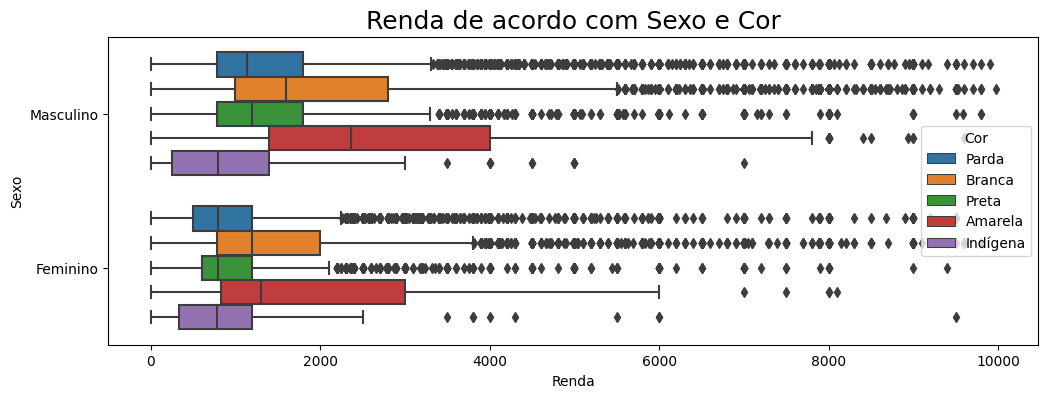

In [ ]:
ax = sns.boxplot(x='Renda', y='Sexo', hue='Cor', data=dados.query('Renda< 10000'),orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda de acordo com Sexo e Cor', fontsize=18)
ax.set_xlabel('Renda')
ax


> ### Conclusões

Escreva suas conclusões aqui...

A cor Amarela tem um rendimento maior em ambos os Sexos

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy.stats import percentileofscore
percentile = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print(f'O Total de pessoas com uma renda de até 788 reais é de: {percentile.round(2)}%')


O Total de pessoas com uma renda de até 788 reais é de: 28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
percentual_99_salario = dados.Renda.quantile(0.99)
print(f'O valor máximo renda por 99% das pesssaos cadastras em nosso Dataset é de: R${percentual_99_salario}')

O valor máximo renda por 99% das pesssaos cadastras em nosso Dataset é de: R$15000.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
frenquencia_classes = pd.crosstab(dados.Sexo, dados['Anos de Estudo'], aggfunc=['mean','median','max','std'], values= dados.Renda).round(2)
frenquencia_classes.rename(index = sexo, inplace=True)
frenquencia_classes.rename(columns = cor, inplace=True )
frenquencia_classes

mean                                               \
Anos de Estudo   1 ano  10 anos  11 anos  12 anos  13 anos  14 anos   
Sexo                                                                  
Feminino        492.77   925.92  1286.79  1682.31  1911.73  2226.46   
Masculino       895.63  1731.27  2117.06  2470.33  3195.10  3706.62   

                                                          ...      std  \
Anos de Estudo 15 anos ou mais  2 anos   3 anos   4 anos  ...   2 anos   
Sexo                                                      ...            
Feminino               3899.51  529.91   546.85   704.28  ...   498.23   
Masculino              6134.28  931.18  1109.20  1302.33  ...  1435.17   

                                                                               \
Anos de Estudo   3 anos   4 anos   5 anos   6 anos   7 anos   8 anos   9 anos   
Sexo                                                                            
Feminino         424.12   629.55   635.78   574.55   602.04   896.78   973.22   
Masculino       2143.80  1419.82  1484.65  1476.63  1419.71  1515.58  2137.66   

                                                                
Anos de Estudo Não determinados Sem instrução e menos de 1 ano  
Sexo                                                            
Feminino                 459.99                         639.31  
Masculino                979.65                        1023.90  

[2 rows x 68 columns]

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  object 
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  object 
 4   Anos de Estudo  76840 non-null  object 
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.1+ MB


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda de acordo com Sexo e Anos de Estudo'}, xlabel='Renda', ylabel='Sexo'>

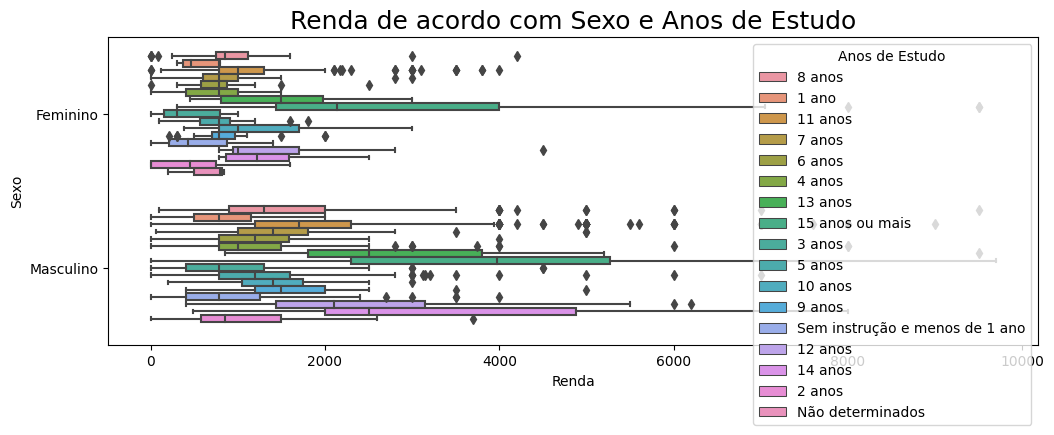

In [ ]:
ax = sns.boxplot(x='Renda', y='Sexo', hue='Anos de Estudo', data=dados.query('Renda< 10000 and Idade == 40'),orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda de acordo com Sexo e Anos de Estudo', fontsize=18)
ax.set_xlabel('Renda')
ax

> ### Conclusões

Escreva suas conclusões aqui...

Pessoas com mais de 15 anos de Estudos tem uma renda maior

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
dados_uf_mean = dados.groupby(['UF']).agg({'Renda':['mean','median','max','std']}).round(2)
dados_uf_mean

Renda                         
                        mean  median     max      std
UF                                                   
Acre                 1506.09   900.0   30000  2276.23
Alagoas              1144.55   788.0   11000  1237.86
Amapá                1861.35  1200.0   15580  2020.69
Amazonas             1445.13   900.0   22000  1757.94
Bahia                1429.65   800.0  200000  3507.92
Ceará                1255.40   789.0   25000  1821.96
Distrito Federal     4241.95  2000.0  100000  5550.46
Espírito Santo       2026.38  1274.0  100000  3513.85
Goiás                1994.58  1500.0   30000  2221.93
Maranhão             1019.43   700.0   30000  1887.82
Mato Grosso          2130.65  1500.0   35000  2542.63
Mato Grosso do Sul   2262.60  1500.0   42000  3031.42
Minas Gerais         2056.43  1200.0  100000  3584.72
Paraná               2493.87  1500.0  200000  4302.94
Paraíba              1293.37   788.0   30000  1950.27
Pará                 1399.08   850.0   50000  2053.78
Pernambuco           1527.08   900.0   50000  2389.62
Piauí                1074.55   750.0   40000  2373.36
Rio Grande do Norte  1344.72   800.0   15500  1651.81
Rio Grande do Sul    2315.16  1500.0   35000  2913.34
Rio de Janeiro       2496.40  1400.0  200000  5214.58
Rondônia             1789.76  1200.0   50000  2406.16
Roraima              1783.59  1000.0   20000  2079.66
Santa Catarina       2470.85  1800.0   80000  3137.65
Sergipe              1109.11   788.0   16000  1479.00
São Paulo            2638.10  1600.0   80000  3503.78
Tocantins            1771.09  1000.0   60000  2934.59

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Renda de acordo com a UF'}, xlabel='Renda', ylabel='UF'>

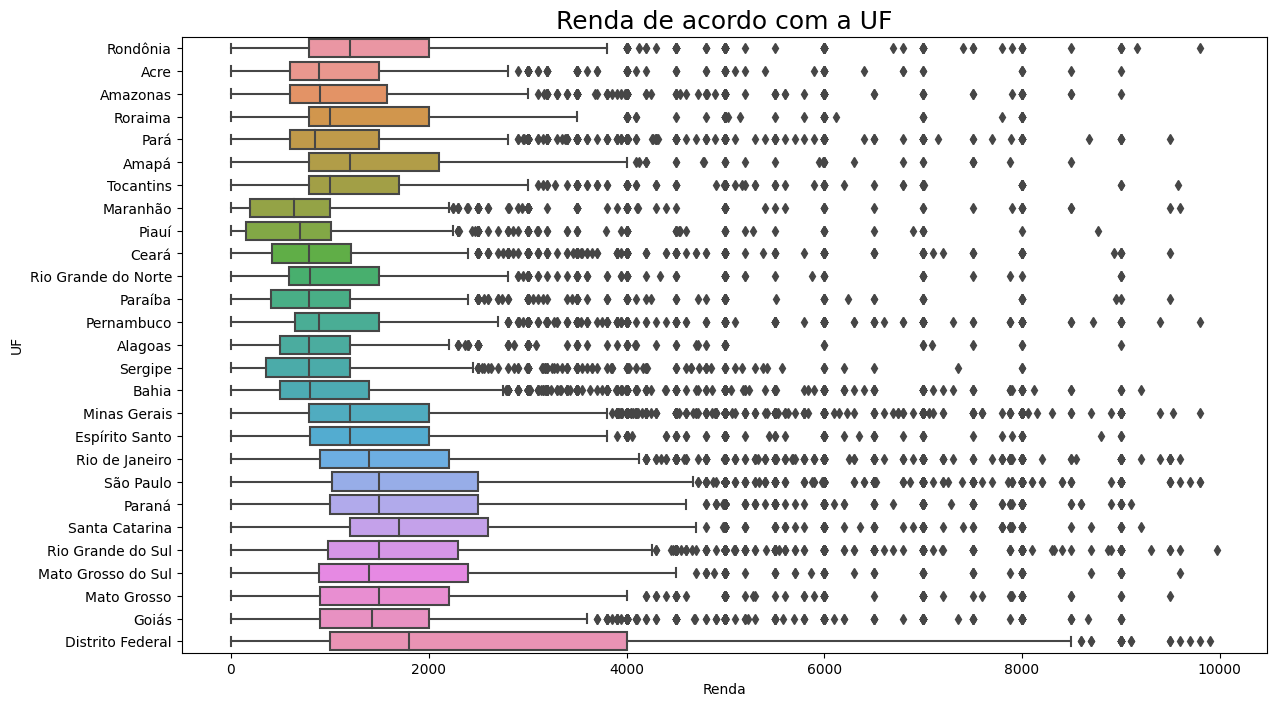

In [ ]:
ax = sns.boxplot(x='Renda', y='UF', data=dados.query('Renda< 10000'),orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title('Renda de acordo com a UF', fontsize=18)
ax.set_xlabel('Renda')
ax

> ### Conclusões

Escreva suas conclusões aqui...